# Clustering Assignment - KMeans & Hierarchical

**Problem Statement**<br>
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. This Assignment categorises the countries using socio-economic and health factors in order to determine countries which are in most dire need of Aid and basic amenities & relief during the time of disasters and natural calamities.

**Analysis steps to be taken :**<br>
1. Read and understand the data
2. Data Visualisation & Preparing for modelling
    - Outliers detection and Treatment
    - Correlation using Heatmaps and Pairplots
    - Feature manipulation
3. Machine Learning Modelling:
    - Cluster Tendency check
    - Scaling data
    - `KMeans clustering`
        - Analysis and recommendation
    - `Hierarchical clustering`
        - Analysis and recommendation
4. Final Recommendation

## Read and understand the data

In [1]:
# Importing all the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import sklearn
from sklearn.preprocessing import StandardScaler

#Libraries for K-Means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#Libraries for Hierarchical

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
# read the dataset
country_df = pd.read_csv("Country-data.csv")
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
# Checking number of rows
country_df.shape

(167, 10)

In [4]:
# Checking if any columns has null values and datatype of these columns
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
country_df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

- No Null Values present in any column of dataframe

In [6]:
# As per data dictionary 'exports', 'health' and 'imports' are given as '%' of gdpp,
# so lets convert them to actual values
country_df['exports'] = (country_df['exports']*country_df['gdpp'])/100
country_df['health'] = (country_df['health']*country_df['gdpp'])/100
country_df['imports'] = (country_df['imports']*country_df['gdpp'])/100

In [7]:
#checking the dataframe after conversion
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [8]:
# Doing statistical check on the data
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [9]:
# Checking for Duplicate values in 'Country' column and removing row if any
country_df.duplicated(subset=['country'], keep=False).sum()

0

No Duplicate Country information present - #167 Unique countries

## Data Visualisation & Preparing for modelling

### checking & treating Outliers

In [10]:
# creating column list except 'Country'
column_list = country_df.columns[1:]
column_list

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

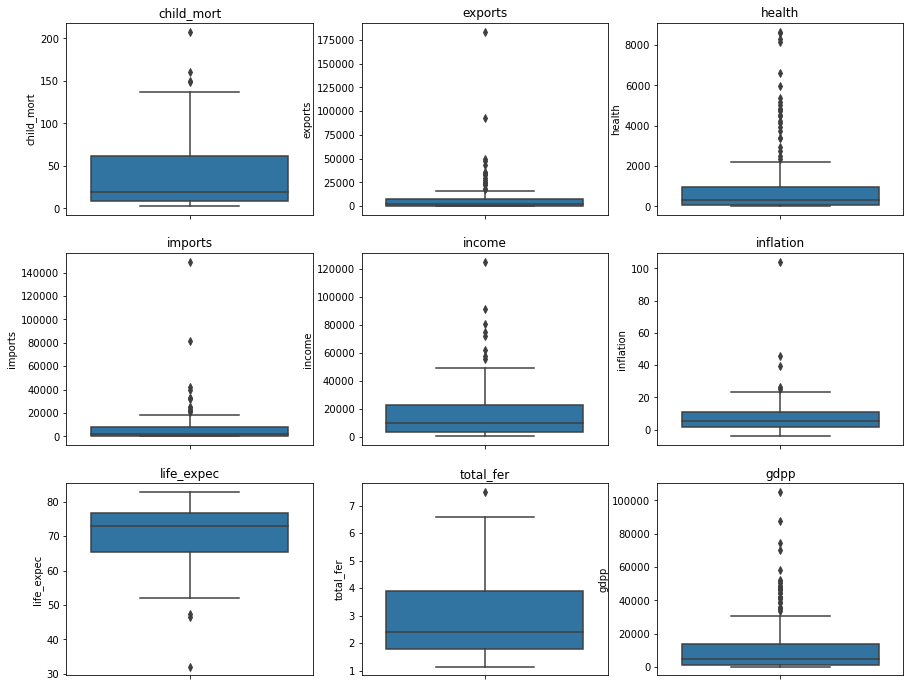

In [11]:
# Boxplot of columns to check the Outliers
plt.figure(figsize=(15,12))
for i in enumerate(column_list):
    plt.subplot(3,3,i[0]+1)
    plt.title(i[1])
    sns.boxplot(y=i[1], data=country_df)

We can see that there are Outliers present in almost all of the features.<br>

But we need to choose a feature, where outlier removal doesnt affect the overall objective of the solution i.e. finding the countries which needs aid. <br>
So, naturally the countries which have high `gdpp` may not need aid and support as they are highly developed countries with standard infrastructure in place to cope up with any natural calamities and disaster.

**To treat Outliers in `gdpp` column we will Cap the data between 0.0 & 0.95 percentiles**

In [12]:
# Define the Quantiles
Q1 = country_df.gdpp.quantile(0.05)
Q3 = country_df.gdpp.quantile(0.95)

# IRQ = Q3 - Q1

#Capping countries with high 'gdpp' only
country_cleaned = country_df[(country_df.gdpp <= Q3)]

In [13]:
country_cleaned.shape

(158, 10)

In [14]:
country_cleaned.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,40.196203,4930.901567,781.770539,4672.041152,14614.955696,8.099367,69.966456,3.009620,9913.379747
std,40.622685,9588.714789,1316.883524,8370.829584,15224.031790,10.759661,8.780099,1.533079,12717.283188
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,10.300000,428.284500,67.989000,536.700000,3290.000000,1.935000,64.150000,1.810000,1310.000000
50%,20.900000,1634.595000,273.188000,1823.400000,9790.000000,5.460000,71.850000,2.530000,4480.000000
75%,62.500000,5629.750000,812.497500,5872.430000,20100.000000,11.175000,76.400000,4.200000,12075.000000
max,208.000000,93200.000000,8663.600000,81084.000000,80600.000000,104.000000,82.800000,7.490000,48400.000000


So we have removed 9 rows/countries from the data as they have high `gdpp` thus are assumed to be developed and their infrastructure are capable to support any disaster.

### checking Correlation using HeatMaps & pairplots

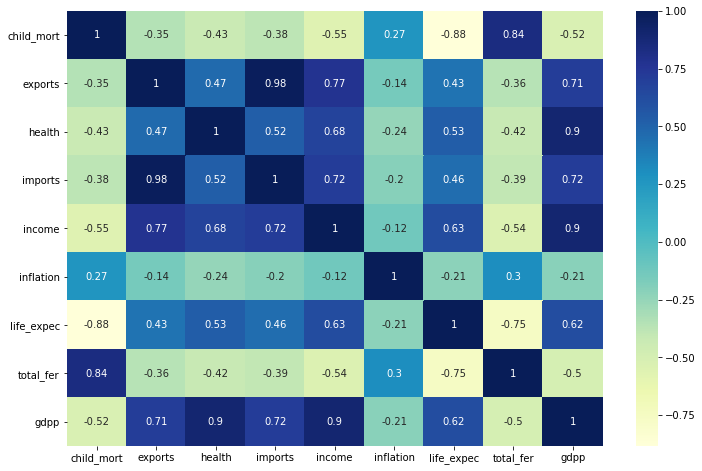

In [15]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (12, 8))
sns.heatmap(country_cleaned.drop('country', axis = 1).corr(), annot = True, cmap="YlGnBu")
plt.show()

We can see `high` correlation between - 
 - income & gdpp
 - health & gdpp
 - child_mort & life_expec(negative)
 - imports & exports
 - child_mort and total_fer has high correlation, which means countries which has high fertility rate have high child mortality as well`

<Figure size 288x288 with 0 Axes>

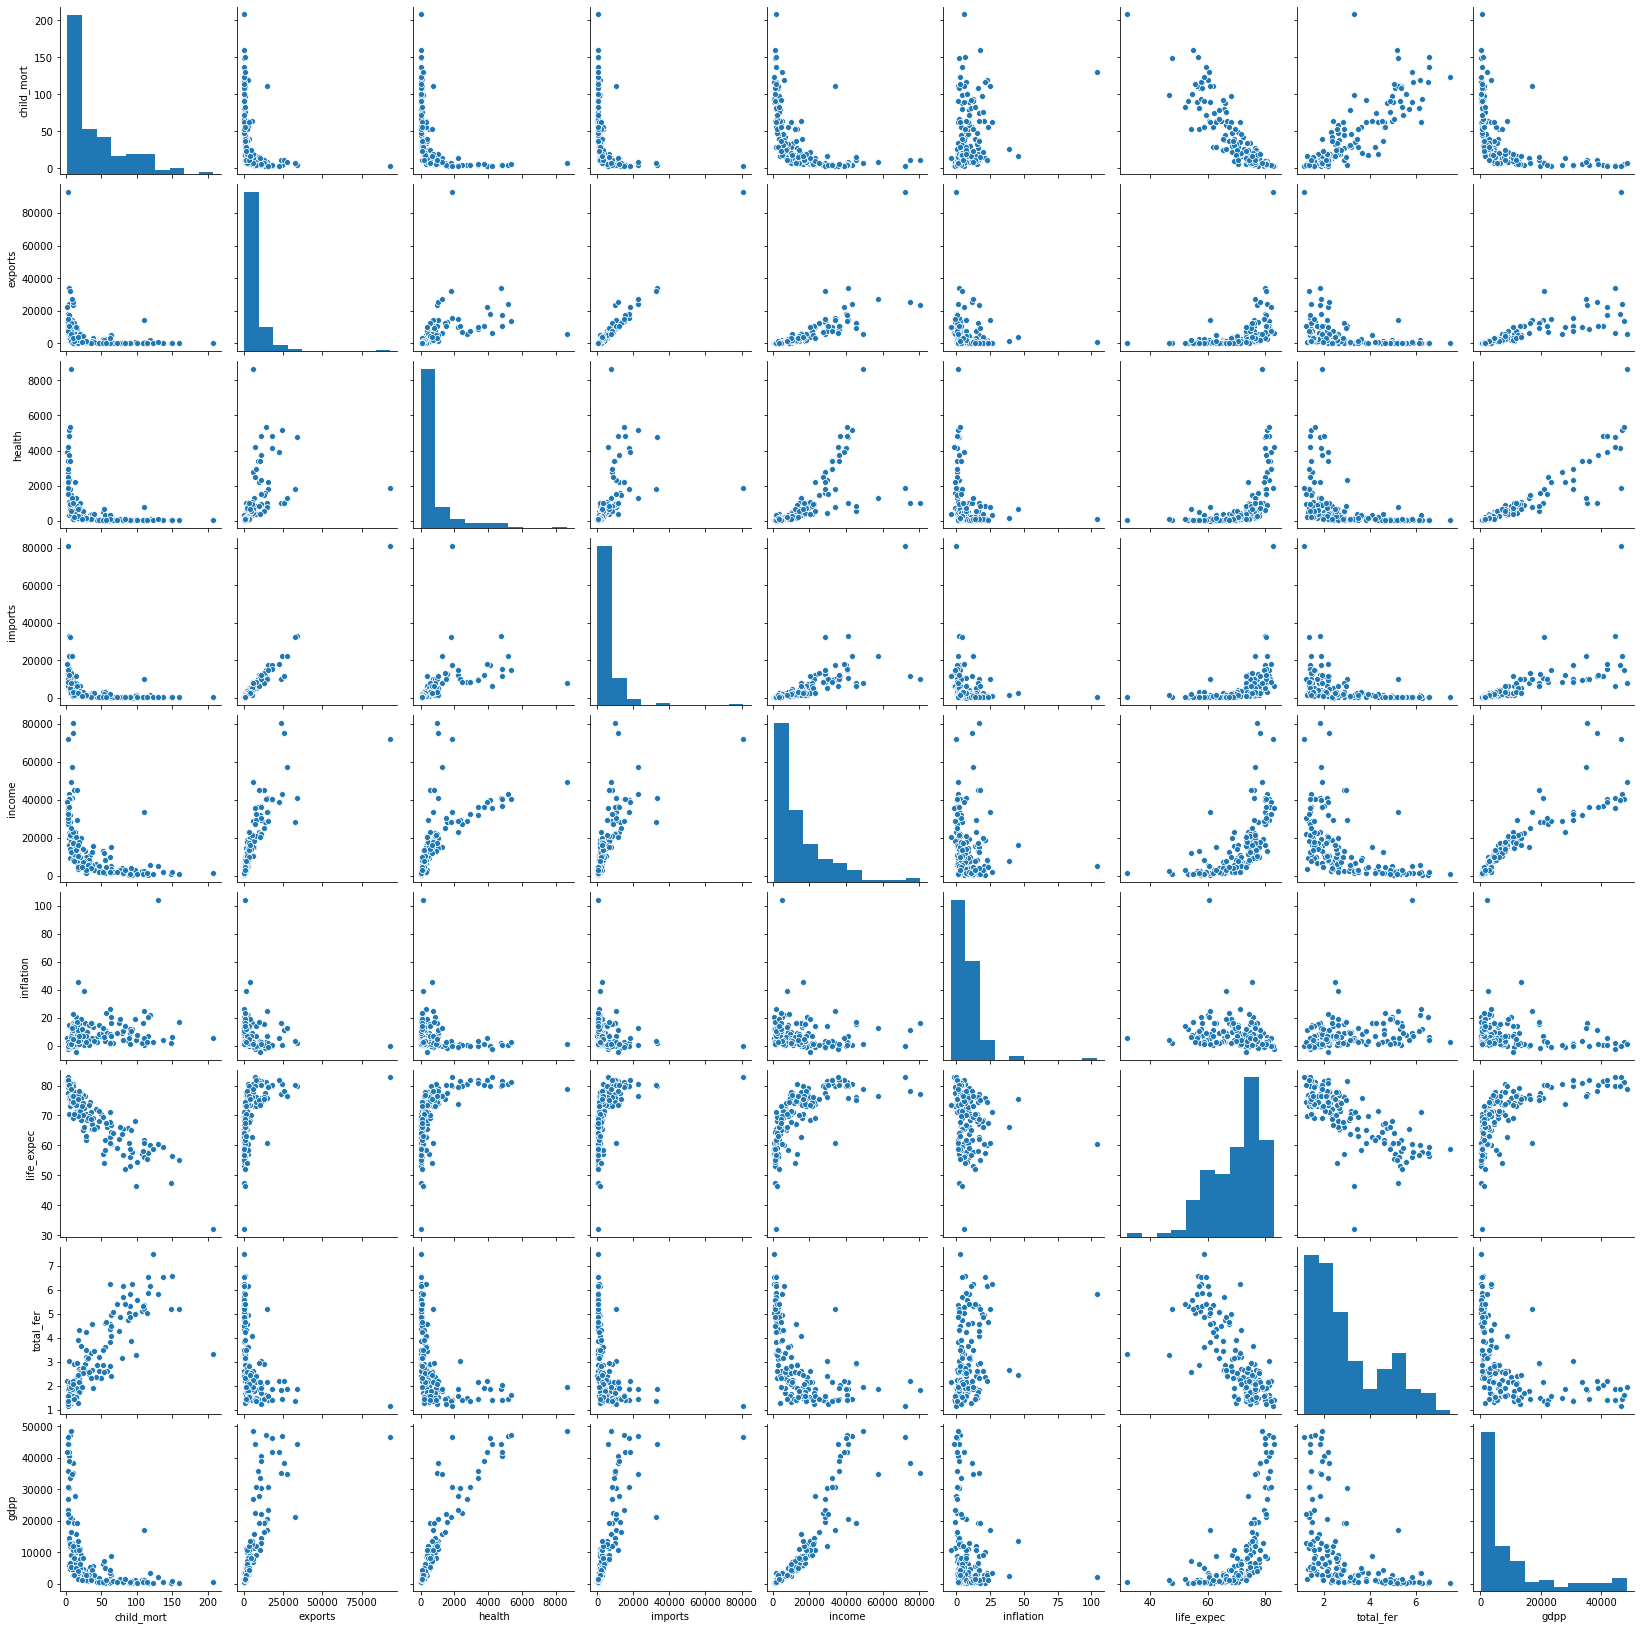

In [16]:
#pairplot of numerical variables
plt.figure(figsize = (4,4))
sns.pairplot(country_cleaned.drop('country', axis = 1))
plt.show()

In [17]:
# Before applying Modelling we need to make 'Country' column as Index as it has all uniques values and also a numerical column
country_cleaned.set_index('country', inplace=True)
country_cleaned.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


## Machine Learning Modelling

### Cluster Tendency check : Hopkins Test

In [18]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [20]:
# Checking Hopkins value
for i in range(10):
    print(hopkins(country_cleaned), end=',')

0.9566700037020136,0.9655348781201928,0.9495920901628615,0.9636841942925538,0.8645892345078751,0.9441334846857387,0.9594784140258967,0.9532156753868612,0.9243461301510743,0.8716320557561308,

We can see that Hopkins Statistics value is high thus data has **high clustering tendency.**

### Scaling the data

In [21]:
# instantiate
scaler = StandardScaler()

# fit_transform
country_scaled = scaler.fit_transform(country_cleaned[column_list])

#Converting into DataFrame and keeping 'country' as index
country_scaled = pd.DataFrame(data=country_scaled, index=country_cleaned.index)
country_scaled.columns = column_list  #defining column names

In [22]:
# Verifying the scaling, indexing and column names
country_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,1.234847,-0.510090,-0.563608,-0.530152,-0.856955,0.124994,-1.572901,1.838989,-0.738376
Albania,-0.582710,-0.396063,-0.391462,-0.321693,-0.308713,-0.336520,0.723646,-0.889676,-0.459367
Algeria,-0.318473,-0.336697,-0.453862,-0.392076,-0.113006,0.745941,0.746497,-0.078274,-0.430180
Angola,1.946065,-0.285794,-0.518900,-0.378423,-0.574267,1.333323,-1.127302,2.061470,-0.503541
Antigua and Barbuda,-0.738289,0.064875,-0.035126,0.301255,0.295540,-0.620888,0.780774,-0.575585,0.180376


### KMeans Clustering

#### Determining the value of K by Statistical methods - Silhouette analysis and SSD

For n_clusters=2, the silhouette score is 0.4769303319503149
For n_clusters=3, the silhouette score is 0.41495653220376433
For n_clusters=4, the silhouette score is 0.42263086407439626
For n_clusters=5, the silhouette score is 0.39056129998759
For n_clusters=6, the silhouette score is 0.34316289803444444
For n_clusters=7, the silhouette score is 0.30777626023420535
For n_clusters=8, the silhouette score is 0.24368352783532898


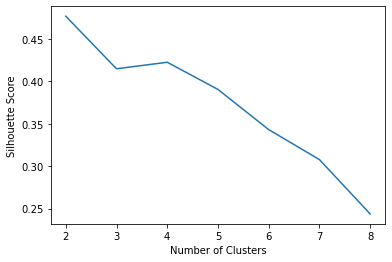

In [23]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_scr =[]
for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(country_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(country_scaled, cluster_labels)
    silhouette_scr.append(silhouette_avg)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

sns.lineplot(x=range_n_clusters, y=silhouette_scr)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

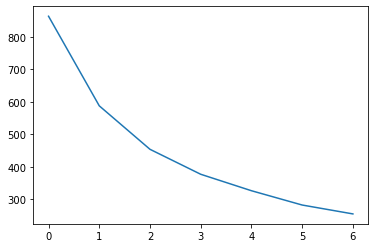

In [24]:
# Elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(country_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

After looking at both Silhouette Score and Elbow curve, **`K=4`** seems the right choice. (considering the slope is not steep from there + Silhouette score is also high than 3)

#### Performing KMeans Clustering with K=4

In [25]:
# Lets perform the clustering now with K=4
kmeans_choosen = KMeans(n_clusters=4, random_state= 0)
kmeans_choosen.fit(country_scaled)

KMeans(n_clusters=4, random_state=0)

In [26]:
# Checking the labels generated
kmeans_choosen.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0,
       1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 1, 0,
       0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0, 2, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2, 2, 0, 0,
       0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 1, 2, 2, 1,
       2, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 2, 0, 0, 2, 3, 1, 1, 2, 0, 1,
       1, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 2, 2], dtype=int32)

In [27]:
# Adding a 'label' column and populating it with labels generated
country_scaled['label'] = kmeans_choosen.labels_

In [28]:
#Checking the dataframe
country_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
country,,,,,,,,,,
Afghanistan,1.234847,-0.510090,-0.563608,-0.530152,-0.856955,0.124994,-1.572901,1.838989,-0.738376,2
Albania,-0.582710,-0.396063,-0.391462,-0.321693,-0.308713,-0.336520,0.723646,-0.889676,-0.459367,0
Algeria,-0.318473,-0.336697,-0.453862,-0.392076,-0.113006,0.745941,0.746497,-0.078274,-0.430180,0
Angola,1.946065,-0.285794,-0.518900,-0.378423,-0.574267,1.333323,-1.127302,2.061470,-0.503541,2
Antigua and Barbuda,-0.738289,0.064875,-0.035126,0.301255,0.295540,-0.620888,0.780774,-0.575585,0.180376,0


In [29]:
#Checking the data count assigned to 4 Clusters
country_scaled.label.value_counts()

0    83
2    45
1    29
3     1
Name: label, dtype: int64

#### Cluster Profiling/Result Analysis and Recommendations

Creating a separate Dataframe and assigning the cluster labels produced by KMeans

In [30]:
#Creating a separate dataframe for K-Means analysis and label intialisation
country_kmeans = country_cleaned

country_kmeans['label'] = kmeans_choosen.labels_
country_kmeans.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
country,,,,,,,,,,
Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2
Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,2
Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


**Visualising the Cluster assignments using Scatter plots for mentioned features :**

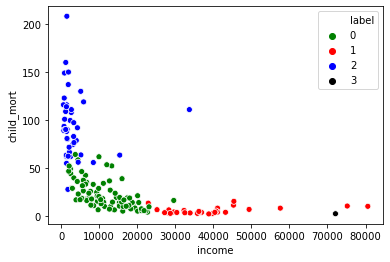

In [31]:
# Scatterplot 1: 'child_mort' & 'income'
sns.scatterplot(y='child_mort', x='income', data=country_kmeans, hue='label', palette=['green', 'red', 'blue','black'])
plt.show()

We can see that **'child_mort' decreases with increase in 'income'** of the country i.e. developed/developing/under-developed countries are all clustered together.

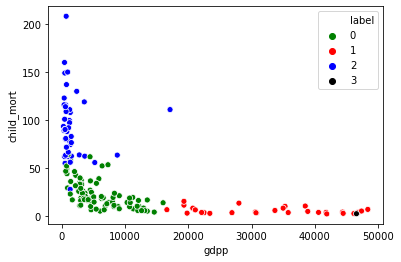

In [32]:
# Scatterplot 2: 'child_mort' & 'gdpp'
sns.scatterplot(y='child_mort', x='gdpp', data=country_kmeans, hue='label', palette=['green', 'red', 'blue','black'])
plt.show()

We can see that **'child_mort' decreases with increase in 'gdpp'** of the country i.e. developed/developing/under-developed countries are all clustered together.

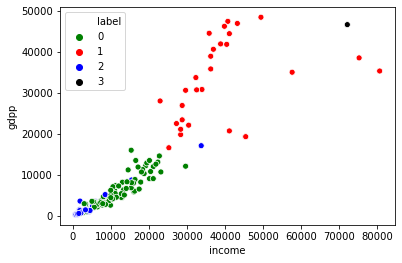

In [33]:
# Scatterplot 3: 'income' & 'gdpp'
sns.scatterplot(y='gdpp', x='income', data=country_kmeans, hue='label', palette=['green', 'red', 'blue','black'])
plt.show()

We can see that **'income' increases with increase in 'gdpp'** of the country i.e. developed/developing/under-developed countries are all clustered together.

Now, we need to find list of Countries which are in dire need of Aid. <br>
We can do this by finding average values of the variables, plotting against Cluster labels and then determining Cluster where these countries belong to.

In [34]:
#Calculating the average of all the columns values, 
#this will be used to see distribution of features against each cluster

child_mort_mean = country_kmeans.groupby(['label']).child_mort.mean()
exports_mean = country_kmeans.groupby(['label']).exports.mean()
health_mean = country_kmeans.groupby(['label']).health.mean()
imports_mean = country_kmeans.groupby(['label']).imports.mean()
income_mean = country_kmeans.groupby(['label']).income.mean()
inflation_mean = country_kmeans.groupby(['label']).inflation.mean()
life_expec_mean = country_kmeans.groupby(['label']).life_expec.mean()
total_fer_mean = country_kmeans.groupby(['label']).total_fer.mean()
gdpp_mean = country_kmeans.groupby(['label']).gdpp.mean()

In [35]:
#Creating a dataframe for Mean values, this will be used for analysis
country_final_df = pd.concat([pd.Series([0,1,2,3]),child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,
                                 total_fer_mean,gdpp_mean], axis=1)
country_final_df.columns = ["ClusterID","child_mort_mean","exports_mean","health_mean","imports_mean","income_mean","inflation_mean","life_expec_mean","total_fer_mean","gdpp_mean"]
country_final_df

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,23.080723,2567.253958,390.660993,2774.770977,11521.566265,7.603964,72.389157,2.312048,5965.084337
1,1,6.148276,15076.862069,2941.186552,13582.134483,39024.137931,3.750069,79.268966,1.823448,32796.551724
2,2,94.537778,790.474867,87.891393,731.346911,3312.733333,11.997000,59.220000,5.102000,1633.600000
3,3,2.800000,93200.000000,1845.360000,81084.000000,72100.000000,-0.046000,82.700000,1.150000,46600.000000


`Using mentioned features only for analysi` - **[gdpp, child_mort and income]**

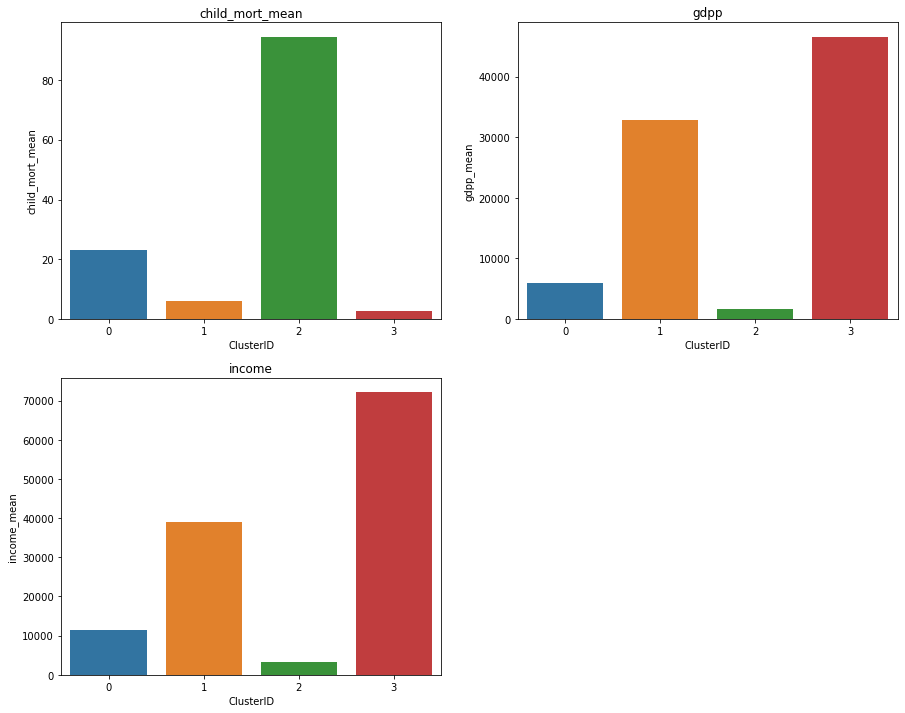

In [36]:
#Analysing the cluster assignment using 'gdpp' , 'income' and 'child_mort'

plt.figure(figsize = (15,12))
plt.figure(1)

# subplot 1
plt.subplot(2, 2, 1)
plt.title("child_mort_mean")
sns.barplot(country_final_df.ClusterID, country_final_df.child_mort_mean)

# subplot 2 
plt.subplot(2, 2, 2)
plt.title("gdpp")
sns.barplot(country_final_df.ClusterID, country_final_df.gdpp_mean)

# subplot 3
plt.subplot(2, 2, 3)
plt.title("income")
sns.barplot(country_final_df.ClusterID, country_final_df.income_mean)

**`Cluster 2`** are group of countries which are in dire need of Aid and support as they have: -
1. Has Highest Child Mortality
2. Has Lowest GDP and Income both

In [37]:
# Displaying the Top List of countries who needs help - from Cluster 1
country_kmeans = country_kmeans.reset_index()
country_kmeans.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


In [38]:
# Sorting the Dataframe where 'label=2', 'gdpp' & 'income' is minimum and 'child_mort' is high (comparitively)
country_kmeans[country_kmeans['label']==2].sort_values(by=['gdpp','income','child_mort'], 
                                                       ascending=[True, True, False]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
25,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,2
85,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327,2
36,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334,2
107,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348,2
125,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399,2


**From above list - 5 countries which are in dire need of Aid**
1. Burundi
2. Liberia
3. Congo, Dem. Rep
4. Niger
5. Sierra Leone

### Hierarchical Clustering

Creating a separate Dataframe and assigning the cluster labels produced by Hierarchical Clustering

In [39]:
#Creating a separate dataframe for K-Means analysis and label intialisation
country_hierarchical = country_cleaned.drop('label', axis=1)
country_hierarchical.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [40]:
#Creating a separate SCALED DF for Hierarchical
country_scaled_hie = country_scaled.drop('label', axis=1)
country_scaled_hie.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,1.234847,-0.510090,-0.563608,-0.530152,-0.856955,0.124994,-1.572901,1.838989,-0.738376
Albania,-0.582710,-0.396063,-0.391462,-0.321693,-0.308713,-0.336520,0.723646,-0.889676,-0.459367
Algeria,-0.318473,-0.336697,-0.453862,-0.392076,-0.113006,0.745941,0.746497,-0.078274,-0.430180
Angola,1.946065,-0.285794,-0.518900,-0.378423,-0.574267,1.333323,-1.127302,2.061470,-0.503541
Antigua and Barbuda,-0.738289,0.064875,-0.035126,0.301255,0.295540,-0.620888,0.780774,-0.575585,0.180376


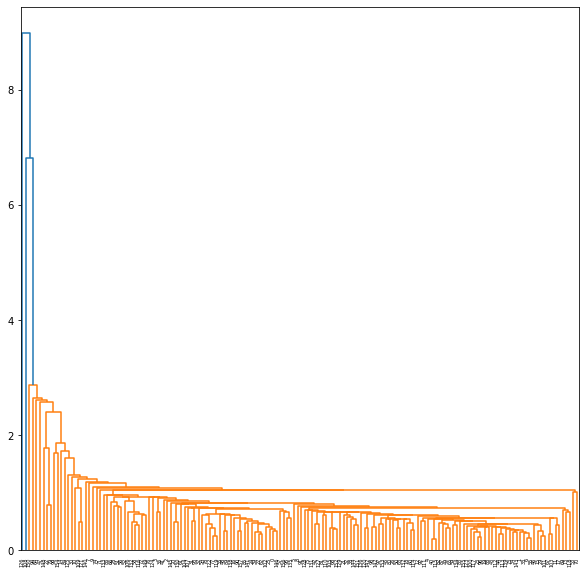

In [41]:
# Performing Single Linkage
plt.figure(figsize=(10,10))
mergings_single = linkage(country_scaled_hie, method='single', metric='euclidean')
dendrogram(mergings_single)
plt.show()

As we can clearly see, single linkage doesn't produce a good enough result for us to analyse the clusters. Hence, we need to go ahead and utilise the `complete` linkage method and then analyse the clusters once again.

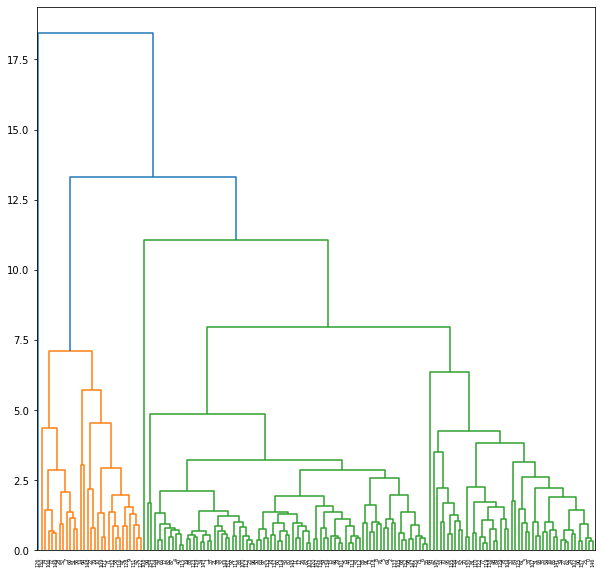

In [42]:
# Performing Complete Linkage
plt.figure(figsize=(10,10))
mergings_complete = linkage(country_scaled_hie, method='complete', metric='euclidean')
dendrogram(mergings_complete)
plt.show()

**Let us cut the dendrogram vertically such that n_clusters = 4**

In [43]:
# Cutting the dendogram at n_clusters=4 and reshaping the labels array
cluster_labels_hc = cut_tree(mergings_complete, n_clusters=4).reshape(-1, )
cluster_labels_hc

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 3, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0])

In [44]:
# Adding the Newly generated Labels
country_hierarchical['label'] = cluster_labels_hc
country_hierarchical.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
country,,,,,,,,,,
Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


In [45]:
#Checking the data count assigned to 4 Clusters
country_hierarchical.label.value_counts()

0    127
1     29
3      1
2      1
Name: label, dtype: int64

#### Cluster Profiling/Result Analysis and Recommendations

**Visualising the Cluster assignments using Scatter plots for mentioned features :**

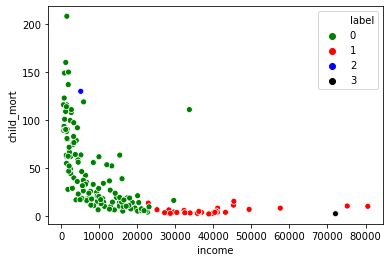

In [46]:
# Scatterplot 1: 'child_mort' & 'income'
sns.scatterplot(y='child_mort', x='income', data=country_hierarchical, hue='label', palette=['green', 'red', 'blue','black'])
plt.show()

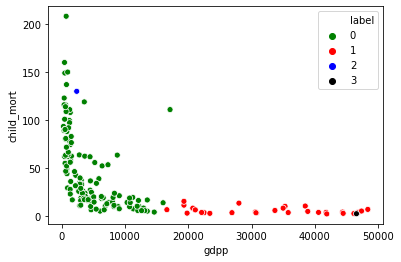

In [47]:
# Scatterplot 2: 'child_mort' & 'gdpp'
sns.scatterplot(y='child_mort', x='gdpp', data=country_hierarchical, hue='label', palette=['green', 'red', 'blue','black'])
plt.show()

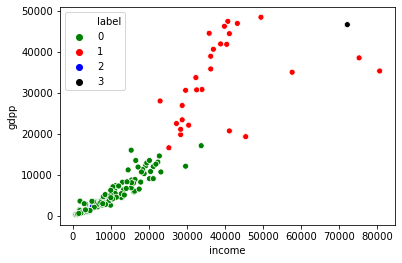

In [48]:
# Scatterplot 3: 'income' & 'gdpp'
sns.scatterplot(y='gdpp', x='income', data=country_hierarchical, hue='label', palette=['green', 'red', 'blue','black'])
plt.show()

**Performing similar analysis for Hierarchical as we did for K-Means**

In [49]:
#Calculating the average of all the columns values, 
#this will be used to see distribution of features against each cluster

child_mort_mean_hc = country_hierarchical.groupby(['label']).child_mort.mean()
exports_mean_hc = country_hierarchical.groupby(['label']).exports.mean()
health_mean_hc = country_hierarchical.groupby(['label']).health.mean()
imports_mean_hc = country_hierarchical.groupby(['label']).imports.mean()
income_mean_hc = country_hierarchical.groupby(['label']).income.mean()
inflation_mean_hc = country_hierarchical.groupby(['label']).inflation.mean()
life_expec_mean_hc = country_hierarchical.groupby(['label']).life_expec.mean()
total_fer_mean_hc = country_hierarchical.groupby(['label']).total_fer.mean()
gdpp_mean_hc = country_hierarchical.groupby(['label']).gdpp.mean()

In [50]:
#Creating a dataframe for Mean values, this will be used for analysis
country_final_df_hc = pd.concat([pd.Series([0,1,2,3]),child_mort_mean_hc,exports_mean_hc,health_mean_hc,imports_mean_hc,income_mean_hc,inflation_mean_hc,life_expec_mean_hc,
                                 total_fer_mean_hc,gdpp_mean_hc], axis=1)
country_final_df_hc.columns = ["ClusterID","child_mort_mean","exports_mean","health_mean","imports_mean","income_mean","inflation_mean","life_expec_mean","total_fer_mean","gdpp_mean"]
country_final_df_hc

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,47.558268,1953.259508,285.526331,2069.379387,8663.094488,8.401528,67.816535,3.272835,4458.929134
1,1,6.148276,15076.862069,2941.186552,13582.134483,39024.137931,3.750069,79.268966,1.823448,32796.551724
2,2,130.000000,589.490000,118.131000,405.420000,5150.000000,104.000000,60.500000,5.840000,2330.000000
3,3,2.800000,93200.000000,1845.360000,81084.000000,72100.000000,-0.046000,82.700000,1.150000,46600.000000


Using mentioned features only for analysis - **[gdpp, child_mort and income]**

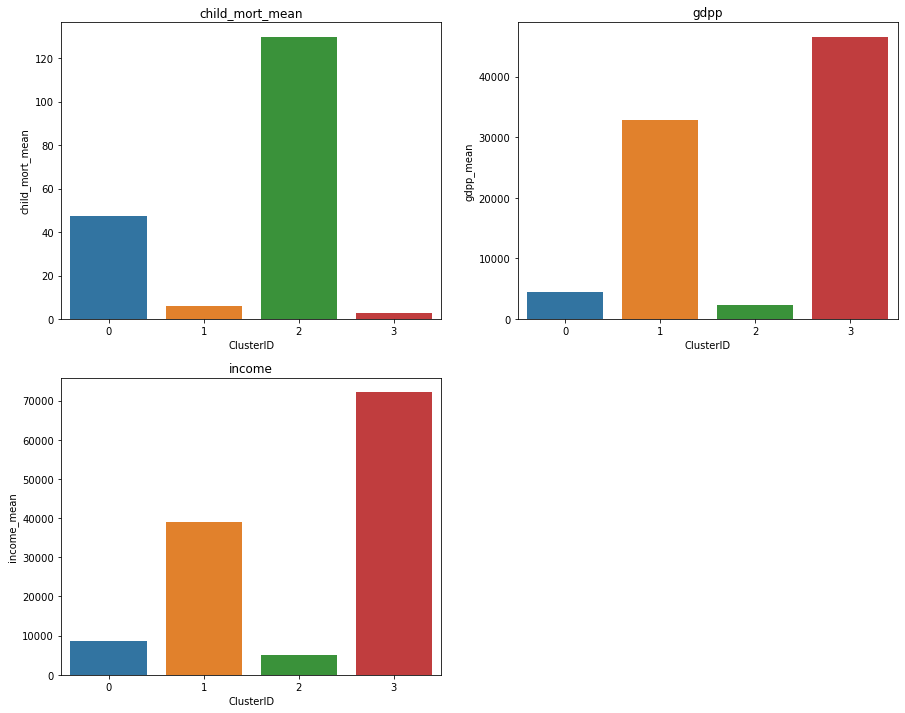

In [51]:
#Analysing the cluster assignment using 'gdpp' , 'income' and 'child_mort'

plt.figure(figsize = (15,12))
plt.figure(1)

# subplot 1
plt.subplot(2, 2, 1)
plt.title("child_mort_mean")
sns.barplot(country_final_df_hc.ClusterID, country_final_df_hc.child_mort_mean)

# subplot 2 
plt.subplot(2, 2, 2)
plt.title("gdpp")
sns.barplot(country_final_df_hc.ClusterID, country_final_df_hc.gdpp_mean)

# subplot 3
plt.subplot(2, 2, 3)
plt.title("income")
sns.barplot(country_final_df_hc.ClusterID, country_final_df_hc.income_mean)

In Hierarchical Clustering we can see that **`Cluster 0`** are group of countries which are in dire need of Aid and support.<br>(Ignoring Cluster 3 as it has only 1 country assigned to it)
1. Has Highest Child Mortality 
2. Has Lowest GDP and Income both

In [52]:
# Displaying the Top List of countries who needs help - from Cluster 0
country_hierarchical = country_hierarchical.reset_index()
country_hierarchical.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


In [53]:
# Sorting the Dataframe where 'label=0', 'gdpp' & 'income' is minimum and 'child_mort' is high (comparitively)
country_hierarchical[country_hierarchical['label']==0].sort_values(by=['gdpp','income','child_mort'], 
                                                       ascending=[True, True, False]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
25,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,0
85,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327,0
36,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334,0
107,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348,0
125,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399,0


**From above list - 5 countries which are in dire need of Aid**
1. Burundi
2. Liberia
3. Congo, Dem. Rep
4. Niger
5. Sierra Leone

## Final Recommendation

**Both Clustering Methodology have produced same recommendations of list of countries which are in dire need to our aid and help**
1. Burundi
2. Liberia
3. Congo, Dem. Rep
4. Niger
5. Sierra Leone